In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Text(0, 0.5, 'HOME')

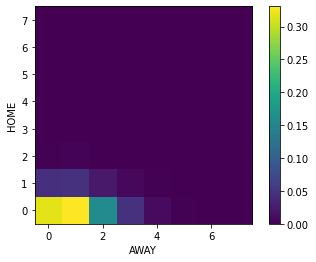

In [2]:
xg_home=0.14 # ホームのゴール期待値の合計
numShots_home=4 # ホームのシュート数の合計

xg_away=0.97 # アウェーのゴール期待値の合計
numShots_away=14 # アウェーのシュート数の合計

numGoal_UL=15 # 計算するゴール数の上限
numGoal_plot_UL=8 # 表示するゴール数の上限

mu_xG_home = xg_home/numShots_home
mu_xG_away = xg_away/numShots_away

p=np.array([1-mu_xG_home, mu_xG_home])
tmp=1
for n1 in range(numShots_home):
    tmp=np.convolve(tmp,p)

p_home=tmp

p=np.array([1-mu_xG_away, mu_xG_away])
tmp=1
for n1 in range(numShots_away):
    tmp=np.convolve(tmp,p)

p_away=tmp

p_mat=np.zeros((np.max( [numShots_home,numGoal_UL]), \
                np.max([numShots_away,numGoal_UL])))

for n1 in range(numShots_home):
    for n2 in range(numShots_away):
        p_mat[n1,n2]=p_home[n1]*p_away[n2]


plt.imshow(p_mat[(numGoal_plot_UL-1)::-1,0:numGoal_plot_UL],\
           extent=(-0.5,numGoal_plot_UL-0.5,-0.5,numGoal_plot_UL-0.5))
plt.colorbar()
plt.xlabel('AWAY')
plt.ylabel('HOME')

Win  prob.= 0.051
Draw prob.= 0.367
Lose prob.= 0.582


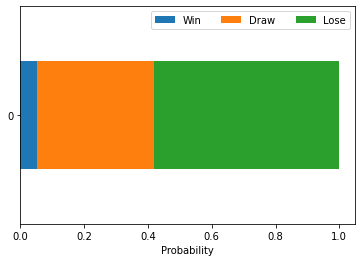

In [9]:
p_win=(np.sum( np.tril(p_mat,k=-1), axis=None))

p_draw=(np.sum(np.diag(p_mat)))

p_lose=np.sum(np.triu(p_mat,k=1), axis=None)

print('Win  prob.= '+'{:1.3f}'.format(p_win))
print('Draw prob.= '+'{:1.3f}'.format(p_draw))
print('Lose prob.= '+'{:1.3f}'.format(p_lose))

df = pd.DataFrame({
    'Win':p_win,
    'Draw':p_draw,
    'Lose':p_lose
}, index=[0])

ax=df.plot(kind='barh', stacked=True)

ax.set_xlabel('Probability')
ax.legend(ncol=3)